In [1]:
# Install required libraries
!pip install pandas numpy statsmodels matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
data = pd.read_csv('IBM2017.csv')

In [4]:
# Ensure the 'Date' column is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
# Prepare the time series data
y = data[['Close']]  # Target: closing price

In [6]:
# Normalize the target variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

In [10]:
# Create lagged features for the VAR model
def create_lagged_features(series, lags=5):
    df = pd.DataFrame(series, columns=['Close'])  # Assign 'Close' column name to the DataFrame
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Close'].shift(lag)
    return df.dropna()

lags = 5
data_lagged = create_lagged_features(y_scaled, lags)

In [11]:
# Split the data into training and test sets
train_size = int(len(data_lagged) * 0.8)
train_data = data_lagged.iloc[:train_size]
test_data = data_lagged.iloc[train_size:]

In [12]:
# Fit the VAR model
model = VAR(train_data)
var_model = model.fit(maxlags=lags)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
# Forecast the future values
forecast_input = test_data.iloc[:lags]
forecast = var_model.forecast(forecast_input.values, steps=len(test_data))
y_pred_scaled = forecast[:, 0]

In [14]:
# Inverse transform the scaled predictions and actual values
y_test_scaled = data_lagged['Close'].iloc[train_size:].values
y_test_inv = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

In [15]:
# Evaluate performance
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.08208957643922142


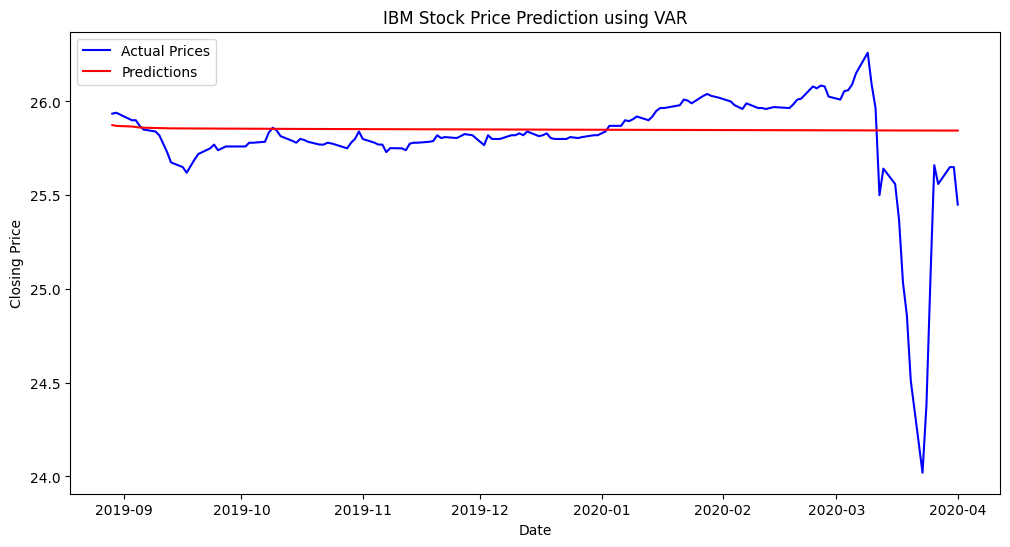

In [16]:
# Plot for visualization of results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test_inv):], y_test_inv, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_pred_inv):], y_pred_inv, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('IBM Stock Price Prediction using VAR')
plt.legend()
plt.show()

Explanation of the Script:

    Install Required Libraries:
        Use !pip install to ensure that pandas, numpy, statsmodels, and matplotlib are installed.

    Load the Data:
        Load the IBM stock data from IBM2017.csv.

    Prepare the Time Series Data:
        Use the Close column as the target variable.

    Normalize the Target Variable:
        Normalize the closing prices using StandardScaler.

    Create Lagged Features:
        Create lagged features for the VAR (Vector Autoregression ) model. In this case, we use past lags values to predict the next value.

    Split the Data:
        Split the lagged data into training and test sets.

    Fit the VAR Model:
        Fit the VAR model on the training data.

    Forecast Future Values:
        Forecast future values using the trained VAR model and the lagged test data.

    Evaluate Performance:
        Calculate the Mean Squared Error (MSE) between the actual and predicted values.

    Plot Results:
        Plot the actual vs. predicted closing prices for visualization.

Notes:

    Ensure the file path 'IBM2017.csv' is correct and that the CSV file contains the necessary columns.
    The lags parameter can be adjusted based on how many past values you want to include as features in the VAR model.
    The script uses only the closing price in this example. For a more complex scenario, you could include additional features or use multiple time series in the VAR model.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>